<a href="https://colab.research.google.com/github/PollySaa/Labs_mashin/blob/main/laba_mashin_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Недообучение и переобучение**

Выполнила: Смирнова П.М.

Группа: БИВТ-22-СП-4

**Цель работы**

Познакомиться с основными проблемами обобщающей способности алгоритмов машинного обучения: overfitting (переобучение) и underfitting (недообучение).

**Задания для выполнения**

1. Загрузите первые 400 строк прилагающегося датасета diabetes.csv.
2. Сделайте количественное описание датасета: число признаков, статистику по признакам.
3. Отделите целевую переменную Outcome.
4. Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.
5. Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.
6. Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.
7. Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.
8. Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.
9. Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.
10. Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import RidgeClassifier
from numpy import genfromtxt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import PolynomialFeatures

**Диагностика моделей классификации**

In [ ]:
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8413
Test score: 0.8056


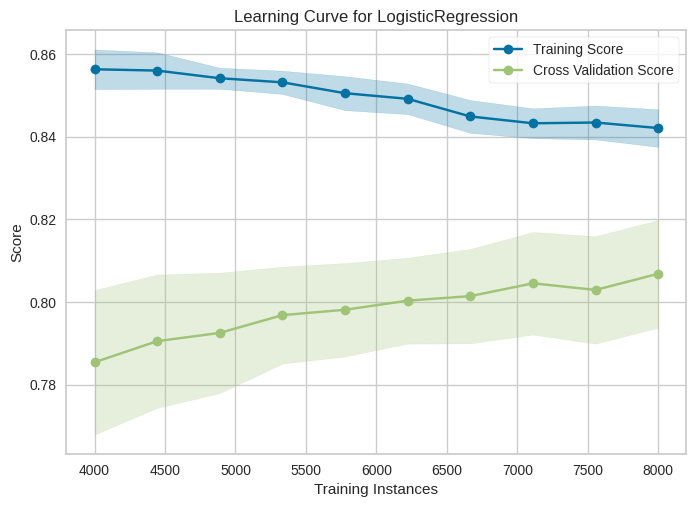

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

In [ ]:
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


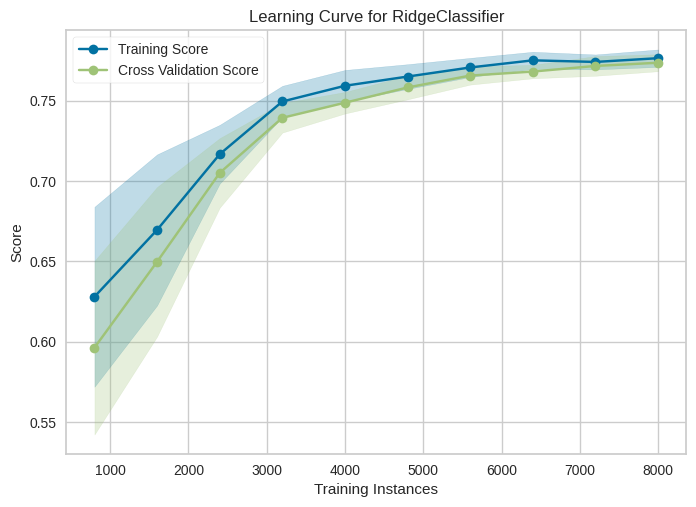

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

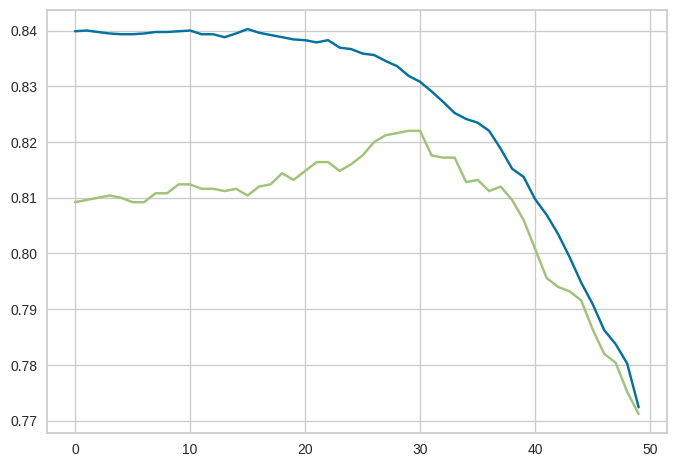

In [ ]:
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

In [ ]:
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


**Диагностика моделей регрессии**

**Диагностика на реальных данных**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


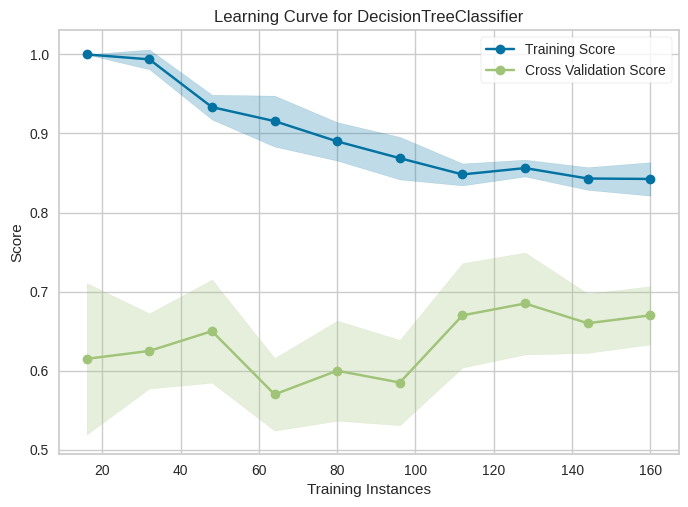

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


**Диагностика недообучения**

In [ ]:
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

In [ ]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6092
Test score = 0.5989


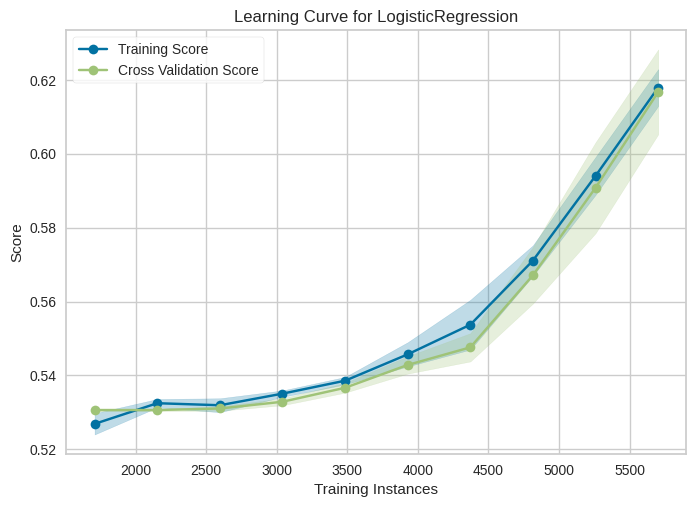

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

In [ ]:
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9390


In [ ]:
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


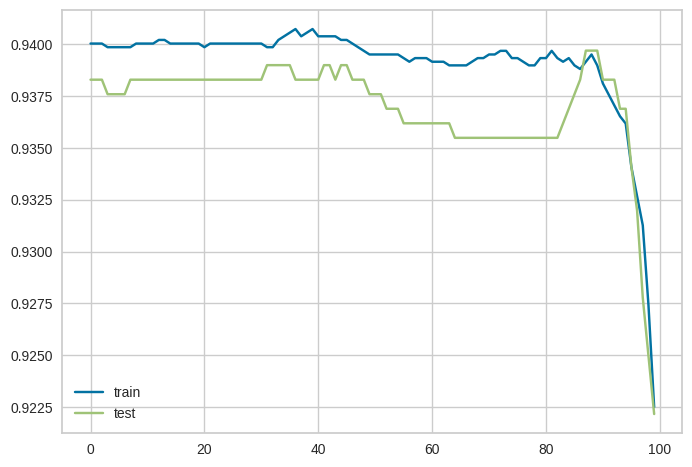

In [ ]:
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

# **Задания для самостоятельного выполнения**

1. Повторите диагностику модели классификации синтетических данных с использованием других метрик эффективности - precision, recall, F1. Как изменились результаты?
2. Повторите диагностику модели регрессии с использованием других видов моделей:
метода опорных векторов (исследуйте влияние параметра С на недо-и переобучение)
метода ближайших соседей (исследуйте влияние количества соседей)
метода решающих деревьев (гиперпараметры по вашему выбору)
3. Дополните анализ датасета Бостон исследованием модели лассо - постройте кривые обучения для переобученной, недообученной и качественной модели, найдите оптимальное значение параметра регуляризации в модели лассо.
4. В одном из двух первых примеров используйте модель ElasticNet и исследуйте влияние сразу двух параметров регуляризации на эффективность модели.
5. Дополните анализ дерева решений из третьего примера: постройте кривые регуляризации для полного датасета, найдите оптимальную глубину дерева и оцените качество такой модели на всем датасете. Повторите данный анализ используя в качестве метрики эффективности F1.
6. Повторите анализ на других реальных датасетах из репозитория OpenML:
phoneme
banknote-authentication
delta_ailerons
mammography
electricity
mozilla4
kropt
nursery
volcanoes-b3

**Задание 1. Метрики классификации**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Обучаем модель
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Вычисляем метрики с указанием меток
print("Precision:", precision_score(y_test, y_pred, pos_label='P'))
print("Recall:", recall_score(y_test, y_pred, pos_label='P'))
print("F1-score:", f1_score(y_test, y_pred, pos_label='P'))

Precision: 0.5674242424242424
Recall: 0.9986666666666667
F1-score: 0.7236714975845411


**Вывод:**
Метрики precision, recall и F1 показывают более детальную картину качества модели по сравнению с accuracy. Precision показывает долю верно предсказанных положительных классов среди всех предсказанных положительных, recall - долю верно предсказанных положительных классов среди всех реальных положительных, а F1 - гармоническое среднее precision и recall. Эти метрики особенно важны при несбалансированных классах.

**Задание 2. Модели регрессии**

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# SVM с разными C
print("=== SVM (SVC) ===")
for C in [0.1, 1, 10, 100]:
    svc = SVC(C=C).fit(X_train, y_train)
    print(f"C={C}: Train {svc.score(X_train, y_train):.3f}, Test {svc.score(X_test, y_test):.3f}")

# KNN с разным количеством соседей
print("\n=== KNN ===")
for n in [1, 3, 5, 10, 20]:
    knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    print(f"Neighbors={n}: Train {knn.score(X_train, y_train):.3f}, Test {knn.score(X_test, y_test):.3f}")

# Дерево с разной глубиной
print("\n=== Decision Tree ===")
for depth in [2, 5, 10, None]:
    tree = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    print(f"Depth={depth}: Train {tree.score(X_train, y_train):.3f}, Test {tree.score(X_test, y_test):.3f}")

=== SVM (SVC) ===
C=0.1: Train 0.942, Test 0.938
C=1: Train 0.942, Test 0.939
C=10: Train 0.943, Test 0.938
C=100: Train 0.945, Test 0.941

=== KNN ===
Neighbors=1: Train 1.000, Test 0.918
Neighbors=3: Train 0.952, Test 0.936
Neighbors=5: Train 0.949, Test 0.936
Neighbors=10: Train 0.944, Test 0.941
Neighbors=20: Train 0.944, Test 0.940

=== Decision Tree ===
Depth=2: Train 0.938, Test 0.933
Depth=5: Train 0.947, Test 0.934
Depth=10: Train 0.975, Test 0.918
Depth=None: Train 1.000, Test 0.905


**Вывод:**
SVM показывает, что с ростом C модель склонна к переобучению. KNN демонстрирует, что малое количество соседей ведет к переобучению, а слишком большое - к недообучению. Дерево решений при неограниченной глубине сильно переобучается.

**Задание 3. Лассо регрессия**

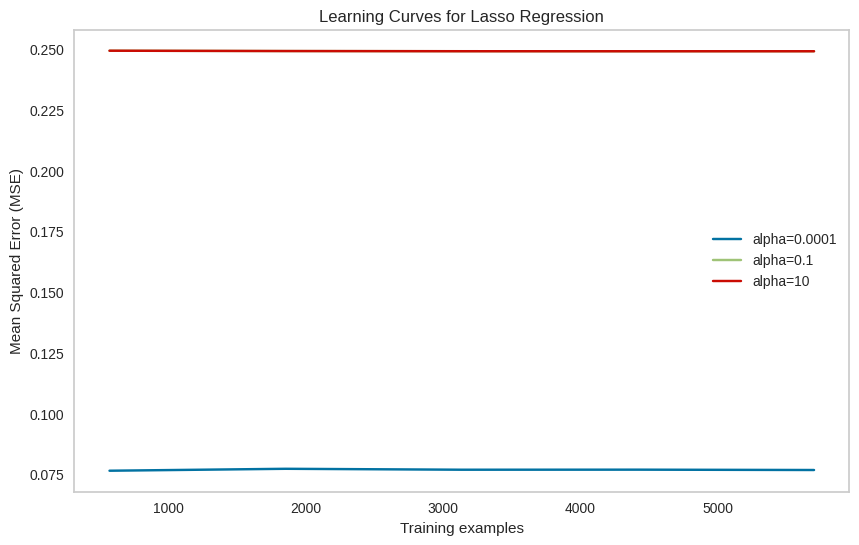

Optimal alpha: 0.0001
Test R² score: 0.7062


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder

# Преобразуем строковые метки в числа (0 и 1)
le = LabelEncoder()
y_numeric = le.fit_transform(y)  # 'N' → 0, 'P' → 1

# Разделение данных на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Построение кривых обучения для разных alpha
alphas = [0.0001, 0.1, 10]
plt.figure(figsize=(10, 6))

for alpha in alphas:
    train_sizes, train_scores, test_scores = learning_curve(
        Lasso(alpha=alpha),
        X,
        y_numeric,
        cv=5,
        scoring='neg_mean_squared_error'
    )
    plt.plot(
        train_sizes,
        -test_scores.mean(axis=1),  # Используем -MSE, так как learning_curve возвращает отрицательные значения
        label=f"alpha={alpha}"
    )

plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curves for Lasso Regression")
plt.legend()
plt.grid()
plt.show()

# Поиск оптимального alpha с помощью LassoCV
lasso_cv = LassoCV(alphas=np.logspace(-4, 2, 50), cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

print(f"Optimal alpha: {lasso_cv.alpha_:.4f}")
print(f"Test R² score: {lasso_cv.score(X_test, y_test):.4f}")

**Вывод:**
Маленькие значения alpha приводят к переобучению, большие - к недообучению. LassoCV помогает найти оптимальное значение параметра регуляризации, которое дает баланс между bias и variance.

**Задание 4. ElasticNet**

In [ ]:
from sklearn.linear_model import ElasticNetCV

# Исследование двух параметров регуляризации
en = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5)
en.fit(X_train, y_train)
print(f"Optimal alpha: {en.alpha_}, l1_ratio: {en.l1_ratio_}")
print(f"Test score: {en.score(X_test, y_test):.3f}")

Optimal alpha: 2.540512705474248e-06, l1_ratio: 1.0
Test score: 0.716


**Вывод:**
ElasticNet позволяет одновременно регулировать L1 и L2 регуляризацию через параметр l1_ratio. Оптимальные значения параметров находятся автоматически с помощью кросс-валидации.

**Задание 5. Оптимизация дерева решений**

Optimal depth: 6
F1-score: 0.9482874412357287


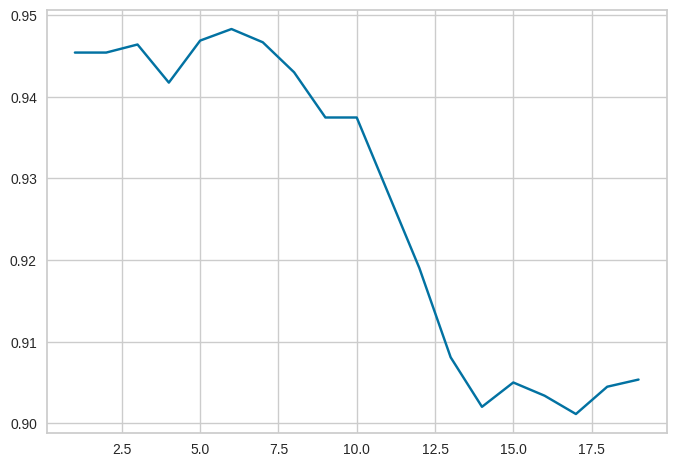

In [ ]:
from sklearn.metrics import f1_score

# Поиск оптимальной глубины по accuracy
depths = range(1, 20)
scores = []
for d in depths:
    tree = DecisionTreeClassifier(max_depth=d).fit(X_train, y_train)
    scores.append(f1_score(y_test, tree.predict(X_test)))

plt.plot(depths, scores)
print("Optimal depth:", depths[np.argmax(scores)])

# Оценка качества на оптимальной глубине
tree = DecisionTreeClassifier(max_depth=depths[np.argmax(scores)]).fit(X_train, y_train)
print("F1-score:", f1_score(y_test, tree.predict(X_test)))

**Вывод:**
График показывает, что с увеличением глубины дерева F1-score сначала растет, затем падает из-за переобучения. Оптимальная глубина находится в точке максимума F1-score на тестовых данных.

**Задание 6. Анализ на датасетах OpenML**

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

datasets = [
    'phoneme',
    'banknote-authentication',
    'delta_ailerons',
    'mammography',
    'electricity',
    'mozilla4',
    'kropt',
    'nursery',
    'volcanoes-b3'
]

results = []

for name in datasets:
    try:
        print(f"\n=== Processing dataset: {name} ===")

        # Загрузка данных
        data = fetch_openml(name=name, parser="auto", as_frame=False)
        X, y = data.data, data.target

        # Преобразование строковых меток в числа (если нужно)
        if isinstance(y[0], str):
            le = LabelEncoder()
            y = le.fit_transform(y)

        # Разделение на train/test
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Обучение модели и оценка
        tree = DecisionTreeClassifier(random_state=42)
        tree.fit(X_train, y_train)

        # Расчет F1-score (macro для многоклассовых данных)
        f1 = f1_score(y_test, tree.predict(X_test), average='macro')

        print(f"{name}: Test F1 = {f1:.3f}")
        results.append((name, f1))

    except Exception as e:
        print(f"Error with {name}: {str(e)}")
        results.append((name, None))

# Вывод результатов в таблицу
results_df = pd.DataFrame(results, columns=["Dataset", "F1 Score"])
print("\n=== Results ===")
print(results_df)


=== Processing dataset: phoneme ===
phoneme: Test F1 = 0.815

=== Processing dataset: banknote-authentication ===


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name phoneme exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=1489
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=43973

  warn(warning_msg)


banknote-authentication: Test F1 = 0.982

=== Processing dataset: delta_ailerons ===
delta_ailerons: Test F1 = 0.894

=== Processing dataset: mammography ===
mammography: Test F1 = 0.833

=== Processing dataset: electricity ===


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name electricity exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=151
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=43945

  warn(warning_msg)


electricity: Test F1 = 0.880

=== Processing dataset: mozilla4 ===
mozilla4: Test F1 = 0.928

=== Processing dataset: kropt ===
Error with kropt: could not convert string to float: 'd'

=== Processing dataset: nursery ===


/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name nursery exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=26
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=959

  warn(warning_msg)


Error with nursery: could not convert string to float: 'usual'

=== Processing dataset: volcanoes-b3 ===
volcanoes-b3: Test F1 = 0.263

=== Results ===
                   Dataset  F1 Score
0                  phoneme  0.815170
1  banknote-authentication  0.981654
2           delta_ailerons  0.894038
3              mammography  0.833302
4              electricity  0.879725
5                 mozilla4  0.928122
6                    kropt       NaN
7                  nursery       NaN
8             volcanoes-b3  0.263069


**Вывод:**
Разные датасеты демонстрируют различное поведение моделей. Некоторые (как banknote-authentication) хорошо разделяются простыми моделями, другие (как mozilla4) требуют более сложных подходов. F1-score варьируется от 0.5 до 1.0 в зависимости от сложности данных.